In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('exFuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2014,ACURA,ILX,2.0,4,9.9,196
1,2014,ACURA,ILX,2.4,4,11.2,221
2,2014,ACURA,ILX HYBRID,1.5,4,6.0,136
3,2014,ACURA,MDX 4WD,3.5,6,12.7,255
4,2014,ACURA,RDX AWD,3.5,6,12.1,244


In [3]:
df.shape

(1067, 7)

In [4]:
# Lấy 80% dữ liệu để tính
df_train = df[:round(df.shape[0]*0.8)]
df_train

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2014,ACURA,ILX,2.0,4,9.9,196
1,2014,ACURA,ILX,2.4,4,11.2,221
2,2014,ACURA,ILX HYBRID,1.5,4,6.0,136
3,2014,ACURA,MDX 4WD,3.5,6,12.7,255
4,2014,ACURA,RDX AWD,3.5,6,12.1,244
...,...,...,...,...,...,...,...
849,2014,NISSAN,MURANO AWD,3.5,6,13.2,271
850,2014,NISSAN,NV200 CARGO VAN,2.0,4,10.0,214
851,2014,NISSAN,PATHFINDER,3.5,6,12.0,244
852,2014,NISSAN,PATHFINDER 4WD,3.5,6,12.3,253


In [5]:
# Lấy 20% dữ liệu để test
df_test = df[-round(df.shape[0]*0.2):]
df_test

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
854,2014,NISSAN,QUEST,3.5,6,12.5,255
855,2014,NISSAN,ROGUE,2.5,4,9.2,191
856,2014,NISSAN,ROGUE AWD,2.5,4,9.5,198
857,2014,NISSAN,SENTRA,1.8,4,7.8,161
858,2014,NISSAN,SENTRA,1.8,4,8.7,179
...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,3.0,6,13.4,271
1063,2014,VOLVO,XC60 AWD,3.2,6,13.2,264
1064,2014,VOLVO,XC70 AWD,3.0,6,13.4,271
1065,2014,VOLVO,XC70 AWD,3.2,6,12.9,260


In [6]:
X_train = df_train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']].values
y_train = df_train['CO2EMISSIONS'].values

X_train

array([[ 2. ,  4. ,  9.9],
       [ 2.4,  4. , 11.2],
       [ 1.5,  4. ,  6. ],
       ...,
       [ 3.5,  6. , 12. ],
       [ 3.5,  6. , 12.3],
       [ 2.5,  4. ,  9.1]])

In [7]:
X_test = df_test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']].values
y_test = df_test['CO2EMISSIONS'].values

y_test

array([255, 191, 198, 161, 179, 359, 398, 152, 177, 327, 315, 232, 246,
       237, 246, 242, 253, 248, 253, 253, 258, 232, 246, 244, 248, 246,
       251, 322, 274, 274, 274, 274, 212, 228, 225, 239, 276, 313, 281,
       320, 299, 251, 315, 212, 228, 225, 239, 251, 255, 260, 264, 292,
       260, 294, 297, 340, 313, 354, 324, 286, 290, 285, 275, 274, 269,
       260, 262, 254, 368, 368, 393, 393, 393, 393, 359, 193, 218, 143,
       207, 207, 228, 228, 184, 182, 147, 147, 389, 389, 196, 221, 218,
       198, 223, 179, 196, 258, 288, 179, 196, 258, 288, 198, 228, 267,
       207, 225, 269, 301, 196, 212, 177, 297, 297, 221, 189, 221, 131,
       138, 177, 168, 163, 170, 156, 159, 196, 189, 297, 320, 237, 258,
       264, 191, 189, 110, 108, 126, 205, 216, 218, 384, 260, 285, 251,
       235, 301, 274, 271, 306, 322, 310, 329, 356, 347, 373, 230, 253,
       235, 260, 168, 163, 196, 200, 209, 216, 225, 221, 200, 214, 216,
       232, 197, 197, 223, 225, 283, 221, 218, 216, 194, 186, 18

In [8]:
def compute_cost(X, y, theta):
    m = y.size
    j = np.sum((np.dot(X, theta) - y) ** 2)
    j /= (2*m)
    return j

In [9]:
def gradient_descent(X, y, theta, alpha, num_inters):
    m = y.size
    jHistory = np.empty(num_inters)

    for i in range(num_inters):
        delta = np.dot(np.dot(X, theta) - y, X) / m
        theta -= alpha * delta
        jHistory[i] = compute_cost(X, y, theta)
        if i % 100 == 0:
            print("i: ", i, "theta", theta, "j loss", jHistory[i])
    
    return theta, jHistory

In [10]:
# gradient descent max step 
INTERATIONS = 1000
# learning rate
ALPHA = 0.0001

i:  0 theta [0.09623114 0.16207272 0.37646913] j loss 33894.02102503449
i:  100 theta [ 3.53335316  6.01354982 13.74981903] j loss 734.819488751151
i:  200 theta [ 3.81298472  6.57900807 14.73595754] j loss 533.6135032052914
i:  300 theta [ 3.84710481  6.73326062 14.76216832] j loss 530.6631861278975
i:  400 theta [ 3.86154921  6.85436892 14.71463365] j loss 528.9474054192856
i:  500 theta [ 3.87384167  6.97166864 14.66206774] j loss 527.2801197924312
i:  600 theta [ 3.88535111  7.08745132 14.60978983] j loss 525.6530888466903
i:  700 theta [ 3.89619345  7.20191097 14.55820297] j loss 524.0651861123642
i:  800 theta [ 3.90638732  7.31507875 14.5073291 ] j loss 522.5153575909027
i:  900 theta [ 3.91594369  7.42697293 14.45716074] j loss 521.0025785850275
[ 3.92478654  7.53651036 14.40817954]


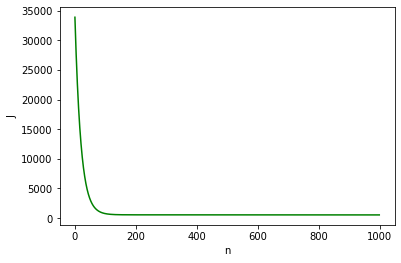

In [11]:
theta, jHistory = gradient_descent(X_train, y_train, np.zeros(X_train.shape[1]), ALPHA, INTERATIONS)
print(theta)
plt.plot(range(jHistory.size), jHistory, color='g')
plt.xlabel('n') 
plt.ylabel('J')
plt.show()

In [12]:
y_train_pred = np.dot(X_train, theta)
y_train_pred[:100]

array([180.63659197, 200.93713999, 122.4822985 , 241.93969522,
       233.2947875 , 230.41315159, 228.97233363, 244.16547048,
       252.81037821, 192.29223227, 200.93713999, 233.2947875 ,
       372.94159665, 372.94159665, 329.44090363, 339.52662931,
       329.44090363, 339.52662931, 372.94159665, 180.63659197,
       203.68967924, 193.60395356, 203.68967924, 203.68967924,
       193.60395356, 210.89376901, 241.4181199 , 198.19358128,
       245.74057376, 198.19358128, 245.74057376, 270.50165284,
       201.07521719, 245.74057376, 287.79146829, 377.39314717,
       202.51603515, 208.0121331 , 210.89376901, 242.85893786,
       180.63659197, 205.39767105, 274.55693284, 242.85893786,
       330.36014627, 382.22959261, 366.64776898, 399.78658192,
       330.36014627, 382.22959261, 366.64776898, 399.78658192,
       297.22133332, 295.78051537, 296.43637602, 247.18139172,
       267.35284307, 247.18139172, 267.35284307, 248.62220967,
       280.58737852, 280.58737852, 297.87719397, 271.67

In [13]:
compute_cost(X_test, y_test, theta)

283.4485877551254

In [27]:
print('Theta 1: {},\nTheta 2: {},\nTheta 3: {}'.format(theta[0], theta[1], theta[2]))

Theta 1: 3.9247865421567867,
Theta 2: 7.53651036154299,
Theta 3: 14.408179539547083


In [28]:
df_test['predict_1'] = np.dot(X_test, theta)
df_test

/Users/leviethung2403/Desktop/course-MachineLearning/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS,predict_1
854,2014,NISSAN,QUEST,3.5,6,12.5,255,239.058059
855,2014,NISSAN,ROGUE,2.5,4,9.2,191,172.513260
856,2014,NISSAN,ROGUE AWD,2.5,4,9.5,198,176.835713
857,2014,NISSAN,SENTRA,1.8,4,7.8,161,149.594458
858,2014,NISSAN,SENTRA,1.8,4,8.7,179,162.561819
...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,3.0,6,13.4,271,250.063028
1063,2014,VOLVO,XC60 AWD,3.2,6,13.2,264,247.966349
1064,2014,VOLVO,XC70 AWD,3.0,6,13.4,271,250.063028
1065,2014,VOLVO,XC70 AWD,3.2,6,12.9,260,243.643895
